# CS512 (AI) Lab Assignment - 1 

### **Due on: 6th Feb 2022 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Armaan Garg, 2019CSZ0002@iitrpr.ac.in
*   Shivam Kainth shivam.20csz0006@iitrpr.ac.in

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment1 then you should name the colab file as: ABC_2019csx1234_Lab1.ipynb


The purpose of this assignment is to exercise your basic understanding of intelligent agents and state space search, and to help you apply these concepts.
In this assignment, you will be experimenting with different AI search techniques that has been discussed in class. You are provided with a starter code for this. The code consists of several segments, some of which you will need to read and understand to complete the assignment, and some of which you can ignore.


# Problem Statement 1 (60 marks)

## Save the world from Cersei Lannister (in a maze game setup).

Story:
Melisandre, also known as red woman, was born in the city of Melony (this city lies in the centre of the maze world), and is known to have supernatural powers. She has been known to be lived for 2000 years and used her sorcery to save the world from evil lannisters. It has been recently known that her immortality comes from the pendant she wears and few wise men say that the owner can only live for a few seconds without the magical pendant.	
But on a very dark day, evil Cersei Lannister stole her pendant and hidden herself into an unknown city of labyrinths. Now it’s our time to save the world and find Cersei as soon as possible and return the pendant to Melisandre and return balance to the world. Thanks to AI this could be done in a very fast and efficient manner. 
Agent Jon Snow (the AI master) is put up to the task of finding the pendant. Thanks to agent Snow we came to know the location of where cercei is hiding and we also have the maze world map. But it will take ages for a person to reach there but with agent snow’s AI mastership this could be done in mere seconds. 
_______________________________________

The maze world is generated from empty grid and then adding walls of random length to random locations.

The goal is to find a path from corner to corner. Possible moves are Up, Down, Left or Right. Distance or length is measured with manhattan distance which is the sum of vertical and horizontal lengths.

Algorithms to compare to find a path :


*   BFS: breadth first search (10 marks)
*   DFS: depth first search  (10 marks)
*   UCS: Uniform-Cost Search  (10 marks)
*   IDS: Iterative Deepning Search (10 marks)
*   A* (A-star) heuristic Search (20 marks)


### Write code in Algorithm section below

There are two performance metrics:

1.   Number of nodes explored
2.   Time taken for execution

### You need to plot graphs for both the metrics. Also, write your observations by pointing out the key differnces among the algorithms. (Use Graph plots & Observations section below to write your code)

# The maze

In [1]:
import numpy as np


def create_maze(size, n_walls, length_walls=0.3):
    maze = np.ones((size, size), dtype=bool)

    for i in range(n_walls):
        row, col = np.random.randint(0, size - 1, 2)

        wall = np.random.poisson(length_walls) * np.random.choice([-1, 1])

        if np.random.choice([True, False]):
            row = make_range(row, wall, size)
        else:
            col = make_range(col, wall, size)

        maze[row, col] = False

    maze[0, 0] = True
    maze[size - 1, size - 1] = True
    return maze


def make_range(start, length, m):
    d = np.clip(np.array([start + length, start]), 0, m - 1)
    return list(range(d.min(), d.max() + 1))


# Algorithm section

In [2]:
"""
Write a function for each algorithm in this section
"""

'\nWrite a function for each algorithm in this section\n'

In [3]:
from collections import deque

In [4]:
def bfs(maze, start, goal):
    m = maze.shape[0]
    finished = False
    path = []
    parent = {}
    parent[start] = (-1, -1)
    explored_nodes = []
    explored_status = {}
    q = deque()
    q.append(start)
    explored_status[start] = 0   #Marker 0 indicating the node is pushed in the frontier but no guarantee
                                 #if its children will be checked
    explored_nodes.append(start) #Explored nodes containing all nodes visited 
    while True:
        if not q:
            break;
        node = q.popleft()
        if (node == goal):
            finished = True
            break;
        explored_status[node] = 1 #Marker 1 indicating the children on the node will definitely be checked
        if (node[1]+1<m): #right
            new_node = (node[0], node[1] + 1)
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.append(new_node)
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[0]+1<m): #down
            new_node = (node[0]+1, node[1])
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.append(new_node)
                    explored_status[new_node] = 0                    
                    explored_nodes.append(new_node)
        if (node[1]-1>=0): #left
            new_node = (node[0], node[1] - 1)
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.append(new_node)
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[0]-1>=0): #up
            new_node = (node[0] - 1, node[1])
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.append(new_node)
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
    if finished:                  
        temp_node = goal
        while temp_node!=(-1, -1):
            path.append(temp_node)
            temp_node = parent[temp_node]
    path.reverse()
    return finished, explored_nodes, path

In [5]:
def dfs(maze, start, goal):
    m = maze.shape[0]
    finished = False
    path = []
    parent = {}
    explored_nodes = []
    explored_status = {}
    stack = deque()
    stack.append(start)
    explored_status[start] = 0
    explored_nodes.append(start)
    parent[start] = None
    while True:
        if not stack:
            break
        node = stack.pop()
        if(node == goal):
            finished = True
            break
        explored_status[node] = 1
        #right
        if ((node[1] + 1) < m):
            new_node = (node[0], node[1] + 1)
            if (maze[new_node[0]][new_node[1]]):
                if (new_node not in explored_status):
                    stack.append(new_node)
                    parent[new_node] = node
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        #down
        if ((node[0] + 1) < m):
            new_node = (node[0] + 1, node[1])
            if (maze[new_node[0]][new_node[1]]):
                if (new_node not in explored_status):
                    stack.append(new_node)
                    parent[new_node] = node
                    explored_status[new_node] = 0                    
                    explored_nodes.append(new_node)
        #left
        if ((node[1] - 1) >= 0):
            new_node = (node[0], node[1] - 1)
            if (maze[new_node[0]][new_node[1]]):
                if (new_node not in explored_status):
                    stack.append(new_node)
                    parent[new_node] = node
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        #up
        if ((node[0] - 1) >=0):
            new_node = (node[0] - 1, node[1])
            if (maze[new_node[0]][new_node[1]]):
                if (new_node not in explored_status):
                    stack.append(new_node)
                    parent[new_node] = node
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
    if(finished):
        temp_node = goal
        while temp_node:
            path.append(temp_node)
            temp_node = parent[temp_node]
        path.reverse()
    return finished, explored_nodes, path

In [6]:
from queue import PriorityQueue

In [7]:
# cost of all right, left, up, down actions is 1
def ucs(maze, start, goal):
    m = maze.shape[0]
    finished = False
    path = []
    parent = {}
    explored_status = {}
    explored_nodes = []
    q = PriorityQueue()
    q.put((0, start))
    parent[start] = (-1, -1)
    explored_status[start] = 0
    explored_nodes.append(start)
    while True:
        if q.empty():
            break;
        node_info = q.get()
        node = node_info[1]
        node_cost = node_info[0]
        if node == goal:
            finished = True
            break
        explored_status[node] = 1
        if (node[1]+1<m): #right
            new_node = (node[0], node[1] + 1)
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((node_cost + 1, new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[0]+1<m): #down
            new_node = (node[0]+1, node[1])
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((node_cost + 1, new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[1]-1>=0): #left
            new_node = (node[0], node[1] - 1)
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((node_cost + 1, new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[0]-1>=0): #up
            new_node = (node[0] - 1, node[1])
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((node_cost + 1, new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
    if finished:                  
        temp_node = goal
        while temp_node!=(-1, -1):
            path.append(temp_node)
            temp_node = parent[temp_node]
    path.reverse()
    return finished, explored_nodes, path

In [8]:
def ids(maze, start, goal):
    m = maze.shape[0]
    finished = False
    net_explored = set()
    explored_status = {}
    path = []
    parent = {}
    stack = deque()
    threshold = 0
    depth = {}
    while finished == False:
        explored_status.clear()
        parent.clear()
        stack.clear()
        depth.clear()
        stack.append(start)
        depth[start] = 0
        parent[start] =None
        explored_status[start] = 0
        net_explored.add(start)
        if threshold:
            threshold = threshold * 2
        else:
            threshold = threshold + 1
        max_explored_depth = 0
        while True:
            if not stack:
                break;
            node = stack.pop()
            if (node == goal):
                finished = True
                break
            explored_status[node] = 1
            new_depth = depth[node] + 1
            if (new_depth<=threshold):
                #right
                if ((node[1] + 1)<m):
                    new_node = (node[0], node[1] + 1)
                    if (maze[new_node[0]][new_node[1]]):
                        if (new_node not in explored_status):
                            depth[new_node] = new_depth
                            parent[new_node] = node
                            explored_status[new_node] = 0
                            net_explored.add(new_node)
                            stack.append(new_node)
                            max_explored_depth = max(max_explored_depth, new_depth)
                #down
                if ((node[0] + 1) < m):
                    new_node = (node[0] + 1, node[1])
                    if (maze[new_node[0]][new_node[1]]):
                        if (new_node not in explored_status):
                            depth[new_node] = new_depth
                            parent[new_node] = node
                            explored_status[new_node] = 0
                            net_explored.add(new_node)
                            stack.append(new_node)
                            max_explored_depth = max(max_explored_depth, new_depth)                            
                #left
                if ((node[1] - 1)>=0):
                    new_node = (node[0], node[1] - 1)
                    if (maze[new_node[0]][new_node[1]]):
                        if (new_node not in explored_status):
                            depth[new_node] = new_depth
                            parent[new_node] = node
                            explored_status[new_node] = 0
                            net_explored.add(new_node)
                            stack.append(new_node)
                            max_explored_depth = max(max_explored_depth, new_depth)
                #up
                if ((node[0] - 1) >= 0):
                    new_node = (node[0] - 1, node[1])
                    if (maze[new_node[0]][new_node[1]]):
                        if (new_node not in explored_status):
                            depth[new_node] = new_depth
                            parent[new_node] = node
                            explored_status[new_node] = 0
                            net_explored.add(new_node)
                            stack.append(new_node)
                            max_explored_depth = max(max_explored_depth, new_depth)
        if ((finished == False) and max_explored_depth < threshold):
            break
    if (finished):
        temp_node = goal
        while temp_node:
            path.append(temp_node)
            temp_node = parent[temp_node]
        path.reverse()
    return finished, list(net_explored), path

In [9]:
def manhattan_heuristic(SIZE):
    h = lambda node, goal: abs(node[0] - goal[0]) + abs(node[1] - goal[1])
    return h

In [10]:
def astar(maze, start, goal, heuristic):
    m = maze.shape[0]
    finished = False
    explored_status = {}
    explored_nodes = []
    parent = {}
    path = []
    q = PriorityQueue()
    q.put((0 + heuristic(start, goal),start))
    explored_status[start] = 0
    explored_nodes.append(start)
    parent[start] = (-1, -1)
    while True:
        if q.empty():
            break
        node_info = q.get()
        node = node_info[1]
        gn_hn = node_info[0] #g(n) + heuristic(n)
        gn = gn_hn - heuristic(node, goal) #g(n) is cost of reaching till here
        if(node == goal):
            finished = True
            break
        explored_status[node] = 1
        if (node[1]+1<m): #right
            new_node = (node[0], node[1] + 1)
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((gn + 1 + heuristic(new_node, goal), new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[0]+1<m): #down
            new_node = (node[0]+1, node[1])
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((gn + 1 + heuristic(new_node, goal), new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[1]-1>=0): #left
            new_node = (node[0], node[1] - 1)
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((gn + 1 + heuristic(new_node, goal), new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
        if (node[0]-1>=0): #up
            new_node = (node[0] - 1, node[1])
            if maze[new_node[0]][new_node[1]] == True:
                if new_node not in explored_status:
                    parent[new_node] = node
                    q.put((gn + 1 + heuristic(new_node, goal), new_node))
                    explored_status[new_node] = 0
                    explored_nodes.append(new_node)
    if finished:                  
        temp_node = goal
        while temp_node!=(-1, -1):
            path.append(temp_node)
            temp_node = parent[temp_node]
    path.reverse()
    return finished, explored_nodes, path        

# Execution section

In [11]:
from collections import namedtuple #Like the dictionary type objects, it contains keys and that are mapped 
#to some values. In this case we can access the elements using keys and indexes.

from functools import partial # You can create partial functions in python by using the partial function from 
#the functools library. Partial functions allow one to derive a function with x parameters to a function 
#with fewer parameters and fixed values set for the more limited function.

from timeit import default_timer as timer
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tabulate #Tabulate is an open-source python package/module which is used to print 
#tabular data in nicely formatted tables

import tqdm
import os

np.random.seed(0)

SIZE = 100
START = (0, 0) 
GOAL = (SIZE - 1, SIZE - 1)
OBSTACLE_COUNT = SIZE ** 2 // 30
OBSTACLE_SIZE = 7

ALGOS = [
    ("DFS", partial(dfs, start=START, goal=GOAL)),
    ("BFS", partial(bfs, start=START, goal=GOAL)),
    ("UCS", partial(ucs, start=START, goal=GOAL)),
    ("IDS", partial(ids, start=START, goal=GOAL)),
    (
       "A-star",
       partial(astar, start=START, goal=GOAL, heuristic=manhattan_heuristic(SIZE)),
    )
]

Result = namedtuple(
    "Result", ["round", "finished", "n_explored", "length_path", "seconds", "algo"]
)


def simulate(n, max_good_mazes=float("inf")):
    results = []
    good_mazes = []
    for i in tqdm.tqdm(range(n), mininterval=1):
        maze = create_maze(SIZE, OBSTACLE_COUNT, OBSTACLE_SIZE)
        for algo_name, algo in ALGOS:
            time_start = timer()
            finished, explored_nodes, path = algo(maze)
            time_end = timer()
            r = Result(
                round=i,
                finished=finished,
                n_explored=len(explored_nodes),
                length_path=None if not finished else len(path),
                seconds=time_end - time_start,
                algo=algo_name,
            )
            results.append(r)
            if finished and algo_name == ALGOS[0][0]:
                good_mazes.append(maze)
                if len(good_mazes) >= max_good_mazes:
                    break

    results_df = pd.DataFrame(results)
    return results_df, good_mazes

result_df, good_mazes = simulate(100)

""" for reference to print the results in a table format"""

result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.59it/s]

| finished   | algo   |    seconds |   n_explored |   length_path |   count |
|:-----------|:-------|-----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.029265   |      2637.94 |        nan    |      35 |
| False      | BFS    | 0.0136581  |      2637.94 |        nan    |      35 |
| False      | DFS    | 0.00552052 |      2637.94 |        nan    |      35 |
| False      | IDS    | 0.0195284  |      2637.94 |        nan    |      35 |
| False      | UCS    | 0.0268908  |      2637.94 |        nan    |      35 |
| True       | A-star | 0.0344251  |      3206.8  |        213.4  |      65 |
| True       | BFS    | 0.03726    |      7186.85 |        213.4  |      65 |
| True       | DFS    | 0.0108512  |      6062.58 |       1716.85 |      65 |
| True       | IDS    | 0.0409248  |      6970.65 |       1564.78 |      65 |
| True       | UCS    | 0.0725706  |      7193.89 |        213.4  |      65 |



C:\anaconda\lib\site-packages\ipykernel_launcher.py:75: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [12]:
""" graph plot code and observations"""
import matplotlib.pyplot as plt
import seaborn as sns
algo_list=result_df.groupby(["algo"])
time_taken=result_df.groupby(["algo"])["seconds"]

In [13]:
algorithm_names = [key for key, item in algo_list]
algorithm_names

['A-star', 'BFS', 'DFS', 'IDS', 'UCS']

In [14]:
time_taken_total = [item.mean() for key, item in time_taken]

time_taken_notfinished = []
time_taken_finished = []

for key, value in result_df.groupby(['algo', 'finished']):
    if key[1] == False:
        time_taken_notfinished.append(value['seconds'].mean())
    else:
        time_taken_finished.append(value['seconds'].mean())

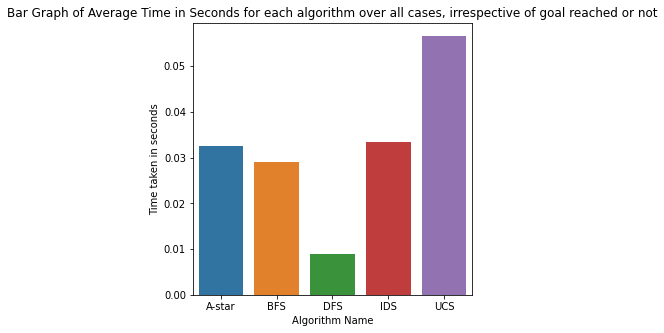

In [15]:
fig = plt.figure(figsize = (5, 5))
ax = sns.barplot(x=algorithm_names,y=time_taken_total)
ax.set_title("Bar Graph of Average Time in Seconds for each algorithm over all cases, irrespective of goal reached or not")
ax.set_xlabel("Algorithm Name")
ax.set_ylabel("Time taken in seconds")
plt.show()

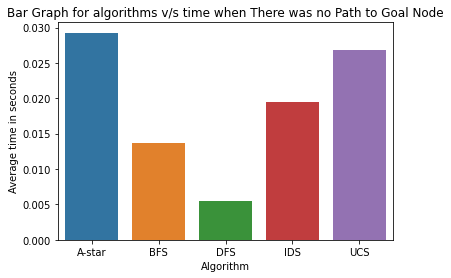

In [16]:
ax = sns.barplot(x=algorithm_names,y=time_taken_notfinished)
ax.set_title("Bar Graph for algorithms v/s time when There was no Path to Goal Node")
ax.set_xlabel("Algorithm")
ax.set_ylabel("Average time in seconds")
plt.show()

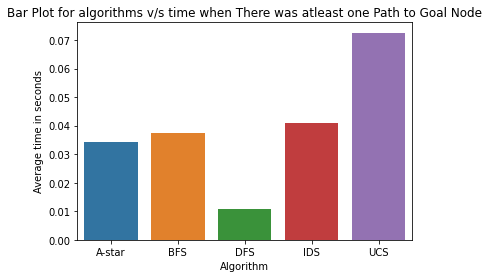

In [17]:
ax = sns.barplot(x=algorithm_names,y=time_taken_finished)
ax.set_title("Bar Plot for algorithms v/s time when There was atleast one Path to Goal Node")
ax.set_xlabel("Algorithm")
ax.set_ylabel("Average time in seconds")
plt.show()

## Observations from the Time Taken vs Algorithm Bar Plots
- It was observed DFS took the least time, in each case, whether goal was reached or not
    - This makes sense, as in DFS there is no intelligent decision making to find the shortest path
    - The frontier in DFS is a simple LIFO stack which doesn't give special preference to any direction
- **Here I have modified the Iterative Deepening Search by changing the threshold to threshold*2 after 1 st iteration, in each iteration**, when it wasn't done, **IDS took the most time about 2 order of magnitudes greater**.
- IDS will take most time as it is increasing the depth one by one and then starting from scratch, i.e. revisiting the already encountered nodes. 
- UCS and BFS, in the current setting perform search in a similar way, as all edge costs here are given to be 1. But UCS takes more time as it has an **overhead** of the **priority queue** it is maintaining.
- Hence UCS takes most time when goal is reached
-  A-star too maintains a priority queue. It is taking **most time when goal is not reachable**
- Though when goal is reachable, the intelligent function in A-star for deciding the priority ie **gn + hn** causes it to have lesser running time than UCS. As **A-star's** search is narrowed down because of the heuristic incorporated.

In [18]:
num_explored = result_df.groupby(["algo"])["n_explored"]
num_explored_total = [item.mean() for key, item in num_explored]

num_explored_notfinished = []
num_explored_finished = []

for key, value in result_df.groupby(['algo', 'finished']):
    if key[1] == False:
        num_explored_notfinished.append(value['n_explored'].mean())
    else:
        num_explored_finished.append(value['n_explored'].mean())

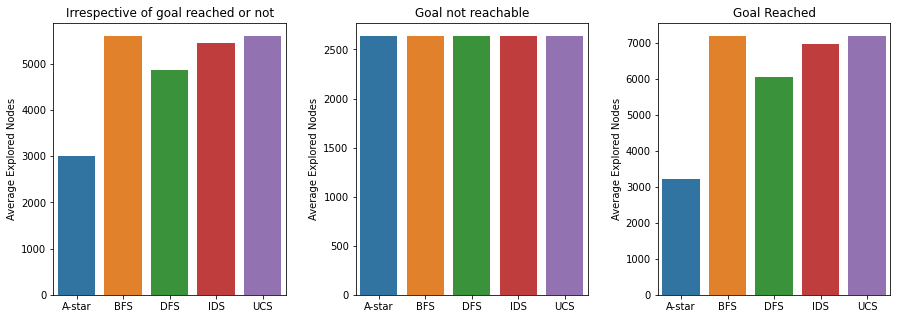

In [19]:
fig = plt.figure(figsize = (15, 5))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
ax = fig.add_subplot(1, 3, 1)
ax = sns.barplot(x=algorithm_names,y=num_explored_total)
ax.set_title("Irrespective of goal reached or not")
ax.set_ylabel("Average Explored Nodes")
ax = fig.add_subplot(1, 3, 2)
ax = sns.barplot(x=algorithm_names,y=num_explored_notfinished)
ax.set_title("Goal not reachable")
ax.set_ylabel("Average Explored Nodes")
ax = fig.add_subplot(1, 3, 3)
ax = sns.barplot(x=algorithm_names,y=num_explored_finished)
ax.set_title("Goal Reached")
ax.set_ylabel("Average Explored Nodes")
plt.show()

## Observations from number of explored nodes vs algorithm
- *When Goal is not reachable*
    - All algorithms have the same number of explored nodes.
    - This occurs because whatever decision an algorithm takes to give priority to specific nodes it has to explore all the possibilities before finally stopping
- *When Goal was reachable*
    - A- star explored the least number of nodes among all, which can be attributed to its intelligent priority queue
    - BFS and UCS together explored almost same number of nodes. The slight difference there is because of different data structure used. **BFS uses a FIFO queue whereas UCS uses a priority queue wihch has a heap implementation and doesn't guarantee stableness (order in which the elements were inserted)**
    - IDS however explores less **unique nodes** than both BFS and DFS. This is because the threshold continually restricts the branches of the IDS search tree. If the **threshold had been incremented by 1 then the situation could have been different(IDS exploring more nodes)**
    - DFS explores lesser nodes than all 3 BFS, IDS and UCS.

## Some Extra Observations:
- The path length in DFS was the most
- BFS, UCS, and A-star all had the optimal path lengths equal to each other
- **IDS had path length shorter than DFS because of the threshold restricting its spread**, it would have been further lower if we had used threshold = threshold + 1

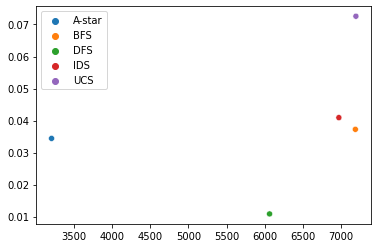

In [20]:
sns.scatterplot(x = num_explored_finished,y = time_taken_finished, hue = algorithm_names)
plt.show()

# Graph plots & Observations

---

Plot graphs related to the various parameters of algorithms for the various test cases given in the next section. 

1.   Plot one graph, which compares the number of nodes explored by every algorithm, while solving the problem.

2.  Plot another graph, comparing the total time taken by each algorithm to complete the execution. 

## Libraries for reference
https://seaborn.pydata.org/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

https://matplotlib.org/stable/tutorials/introductory/pyplot.html


 


In [21]:
def plot_graph(result_df, which):
    algo_list=result_df.groupby(["algo"])
    time_taken=result_df.groupby(["algo"])["seconds"]
    algorithm_names = [key for key, item in algo_list]
    if which == 'time':
        time_taken_total = [item.mean() for key, item in time_taken]

        time_taken_notfinished = []
        time_taken_finished = []

        for key, value in result_df.groupby(['algo', 'finished']):
            if key[1] == False:
                time_taken_notfinished.append(value['seconds'].mean())
            else:
                time_taken_finished.append(value['seconds'].mean()) 
        fig = plt.figure(figsize = (15, 5))
        fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
        ax = fig.add_subplot(1, 3, 1)
        ax = sns.barplot(x=algorithm_names,y=time_taken_total)
        ax.set_title("Irrespective of goal reached or not")
        ax.set_ylabel("Average Time Taken in s")
        ax = fig.add_subplot(1, 3, 2)
        ax = sns.barplot(x=algorithm_names,y=time_taken_notfinished)
        ax.set_title("Goal not reachable")
        ax.set_ylabel("Average Time Taken in s")
        ax = fig.add_subplot(1, 3, 3)
        ax = sns.barplot(x=algorithm_names,y=time_taken_finished)
        ax.set_title("Goal Reached")
        ax.set_ylabel("Average Time Taken in s")
        plt.show()                            
    else:
        num_explored = result_df.groupby(["algo"])["n_explored"]
        num_explored_total = [item.mean() for key, item in num_explored]

        num_explored_notfinished = []
        num_explored_finished = []

        for key, value in result_df.groupby(['algo', 'finished']):
            if key[1] == False:
                num_explored_notfinished.append(value['n_explored'].mean())
            else:
                num_explored_finished.append(value['n_explored'].mean())  
        fig = plt.figure(figsize = (15, 5))
        fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
        ax = fig.add_subplot(1, 3, 1)
        ax = sns.barplot(x=algorithm_names,y=num_explored_total)
        ax.set_title("Irrespective of goal reached or not")
        ax.set_ylabel("Average Explored Nodes")
        ax = fig.add_subplot(1, 3, 2)
        ax = sns.barplot(x=algorithm_names,y=num_explored_notfinished)
        ax.set_title("Goal not reachable")
        ax.set_ylabel("Average Explored Nodes")
        ax = fig.add_subplot(1, 3, 3)
        ax = sns.barplot(x=algorithm_names,y=num_explored_finished)
        ax.set_title("Goal Reached")
        ax.set_ylabel("Average Explored Nodes")
        plt.show()    

### Test Case 1:


In [22]:
START = (1, 1) 
GOAL = (SIZE - 1, SIZE - 1)
result_df1, good_mazes = simulate(100)
result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df1.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.27it/s]

| finished   | algo   |    seconds |   n_explored |   length_path |   count |
|:-----------|:-------|-----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.029265   |      2637.94 |        nan    |      40 |
| False      | BFS    | 0.0136581  |      2637.94 |        nan    |      40 |
| False      | DFS    | 0.00552052 |      2637.94 |        nan    |      40 |
| False      | IDS    | 0.0195284  |      2637.94 |        nan    |      40 |
| False      | UCS    | 0.0268908  |      2637.94 |        nan    |      40 |
| True       | A-star | 0.0344251  |      3206.8  |        213.4  |      60 |
| True       | BFS    | 0.03726    |      7186.85 |        213.4  |      60 |
| True       | DFS    | 0.0108512  |      6062.58 |       1716.85 |      60 |
| True       | IDS    | 0.0409248  |      6970.65 |       1564.78 |      60 |
| True       | UCS    | 0.0725706  |      7193.89 |        213.4  |      60 |



C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


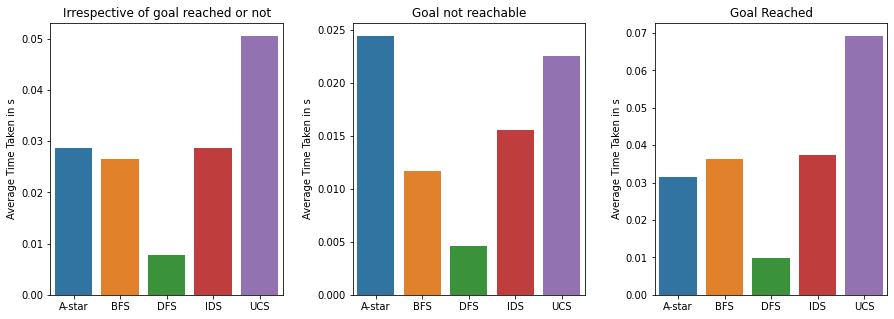

In [23]:
plot_graph(result_df1, 'time')

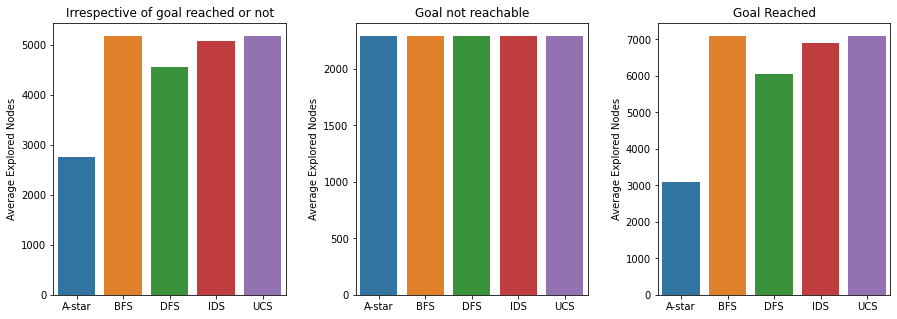

In [24]:
plot_graph(result_df1, 'explored_nodes')

### Test Case 2

In [25]:
START = (2, 0) 
GOAL = (SIZE - 1, SIZE - 1)
result_df2, good_mazes = simulate(100)
result_agg = result_df2.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df2.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.44it/s]

| finished   | algo   |    seconds |   n_explored |   length_path |   count |
|:-----------|:-------|-----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0264494  |      2553.93 |        nan    |      45 |
| False      | BFS    | 0.0127757  |      2553.93 |        nan    |      45 |
| False      | DFS    | 0.00497398 |      2553.93 |        nan    |      45 |
| False      | IDS    | 0.0182941  |      2553.93 |        nan    |      45 |
| False      | UCS    | 0.0243     |      2553.93 |        nan    |      45 |
| True       | A-star | 0.032892   |      3329.18 |        211.8  |      55 |
| True       | BFS    | 0.0350305  |      7097.44 |        211.8  |      55 |
| True       | DFS    | 0.00971128 |      6126.62 |       1739.73 |      55 |
| True       | IDS    | 0.0373406  |      6920.67 |       1594.75 |      55 |
| True       | UCS    | 0.0665987  |      7105.44 |        211.8  |      55 |



C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


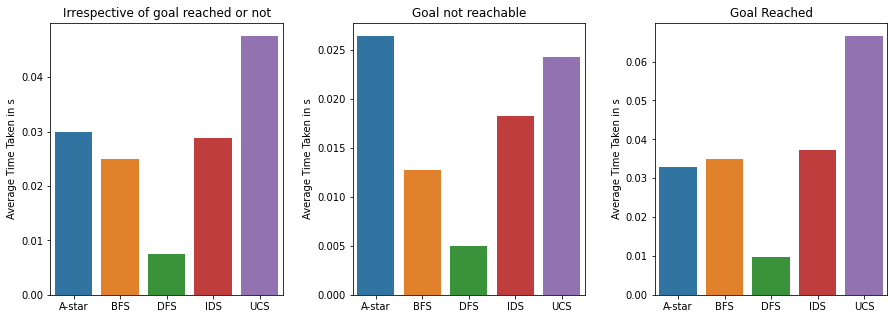

In [26]:
plot_graph(result_df2, which = 'time')

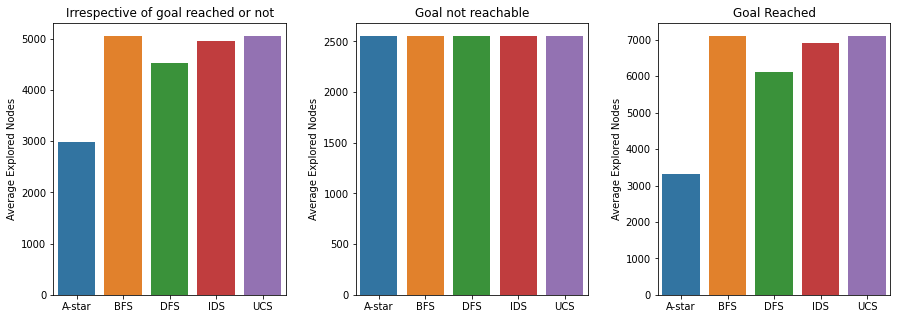

In [27]:
plot_graph(result_df2, which = 'explored_nodes')

### Test Case 3

In [28]:
START = (1, 0) 
GOAL = (SIZE - 2, SIZE - 1)
result_df3, good_mazes = simulate(100)
result_agg = result_df3.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df3.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.95it/s]

| finished   | algo   |    seconds |   n_explored |   length_path |   count |
|:-----------|:-------|-----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0250042  |      2315.6  |       nan     |      35 |
| False      | BFS    | 0.0121064  |      2315.6  |       nan     |      35 |
| False      | DFS    | 0.00471672 |      2315.6  |       nan     |      35 |
| False      | IDS    | 0.0165027  |      2315.6  |       nan     |      35 |
| False      | UCS    | 0.0229881  |      2315.6  |       nan     |      35 |
| True       | A-star | 0.0335909  |      3157.28 |       213.031 |      65 |
| True       | BFS    | 0.0368671  |      7027.63 |       213.031 |      65 |
| True       | DFS    | 0.00975585 |      5792.68 |      1650.63  |      65 |
| True       | IDS    | 0.0363557  |      6920.49 |      1408.32  |      65 |
| True       | UCS    | 0.070336   |      7037.77 |       213.031 |      65 |



C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


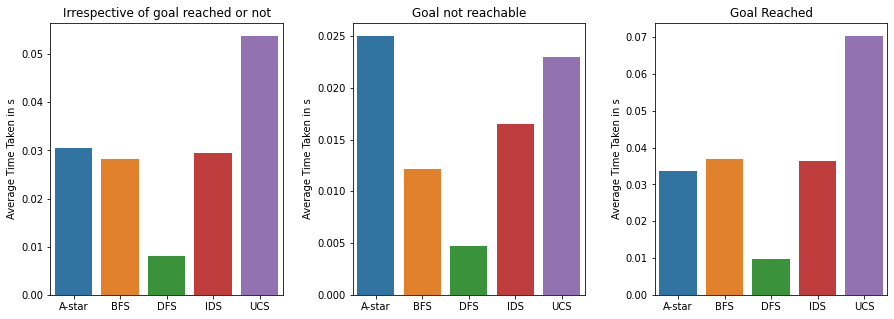

In [29]:
plot_graph(result_df3, 'time')

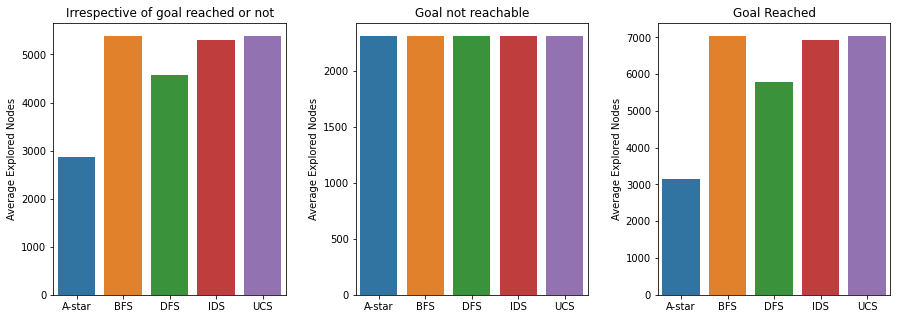

In [31]:
plot_graph(result_df3, 'explored_nodes')

### Test Case 4

In [32]:
START = (3, 0) 
GOAL = (SIZE - 1, SIZE - 2)
result_df4, good_mazes = simulate(100)
result_agg = result_df4.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df4.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.25it/s]

| finished   | algo   |    seconds |   n_explored |   length_path |   count |
|:-----------|:-------|-----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0265627  |      2400.65 |       nan     |      48 |
| False      | BFS    | 0.0127322  |      2400.65 |       nan     |      48 |
| False      | DFS    | 0.00498295 |      2400.65 |       nan     |      48 |
| False      | IDS    | 0.0169528  |      2400.65 |       nan     |      48 |
| False      | UCS    | 0.0248482  |      2400.65 |       nan     |      48 |
| True       | A-star | 0.0344403  |      3252.92 |       213.808 |      52 |
| True       | BFS    | 0.0377572  |      7210.65 |       213.808 |      52 |
| True       | DFS    | 0.0102639  |      6057.48 |      1693.88  |      52 |
| True       | IDS    | 0.0381025  |      7060.5  |      1516.23  |      52 |
| True       | UCS    | 0.0724922  |      7218.83 |       213.808 |      52 |



C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


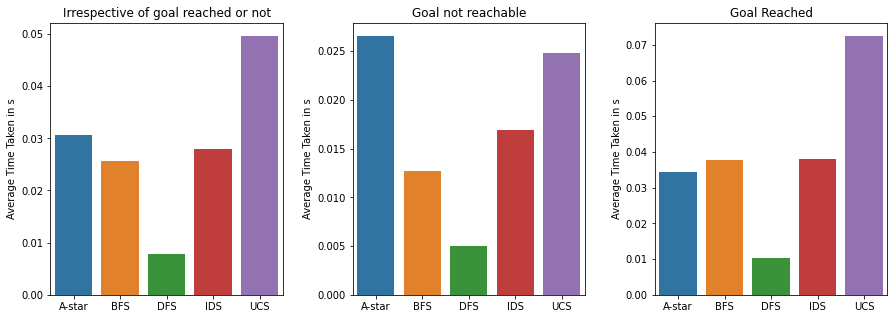

In [33]:
plot_graph(result_df4, 'time')

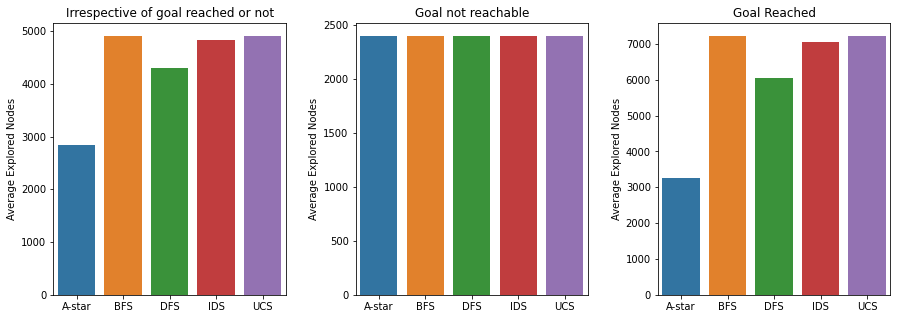

In [34]:
plot_graph(result_df4, 'explored_nodes')

### Test Case 5

In [35]:
START = (1, 3) 
GOAL = (SIZE - 1, SIZE - 3)
result_df5, good_mazes = simulate(100)
result_agg = result_df5.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df5.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.17it/s]

| finished   | algo   |    seconds |   n_explored |   length_path |   count |
|:-----------|:-------|-----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0446723  |      3684.04 |       nan     |      45 |
| False      | BFS    | 0.0205652  |      3684.04 |       nan     |      45 |
| False      | DFS    | 0.00794457 |      3684.04 |       nan     |      45 |
| False      | IDS    | 0.0249822  |      3684.04 |       nan     |      45 |
| False      | UCS    | 0.0390784  |      3684.04 |       nan     |      45 |
| True       | A-star | 0.0365557  |      3233.95 |       211.255 |      55 |
| True       | BFS    | 0.0397261  |      7082.71 |       211.255 |      55 |
| True       | DFS    | 0.0107245  |      5876.87 |      1711.73  |      55 |
| True       | IDS    | 0.0404129  |      6776.6  |      1569.84  |      55 |
| True       | UCS    | 0.0765121  |      7093.27 |       211.255 |      55 |



C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


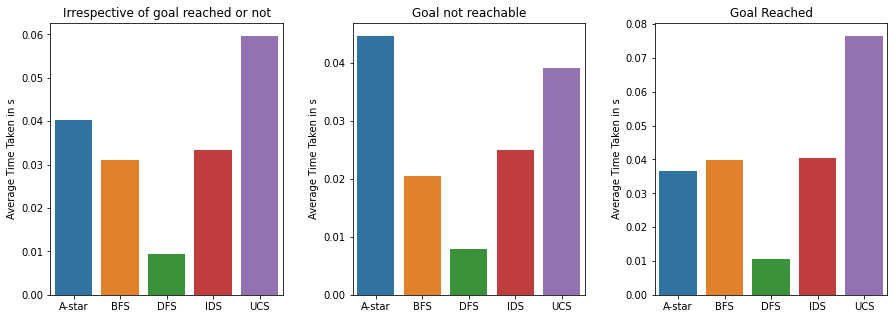

In [36]:
plot_graph(result_df5, 'time')

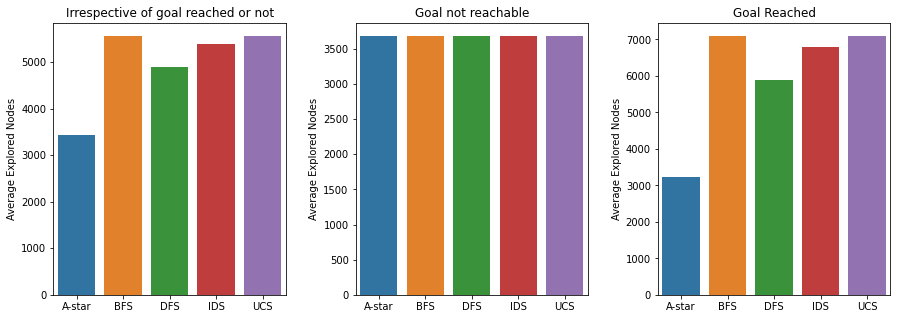

In [37]:
plot_graph(result_df5, 'explored_nodes')

## I observe from the above test cases similar pattern as followed before is being followed

# Problem Statement 2 (40 marks)
## So many Queens, how to manage?

During a gladiatorial contests at the roman empire, a fine king invited all his queens to witness the valour of the gladiators. However, the queens were not in likings of one-another and must not see eye-to-eye. Your job as the "Minister of Strategies" in King's office is to create a sitting arrangement for all queens, while keeping in mind that no two queens are in the "LINE OF SIGHT" of one another i.e. the queens must be avoided to be in the same row or column or diagonally. 

 The "minister of Strategies" had recently enrolled in the Class of Artificial Intellignece CS 512 and decided to use A* algorithm to solve the problem.


Heuristic to be used for this problem is " Number of attacked queens", where if any new queen is placed in "LINE of ATTACK" of other queen, the Heuristic is incremented by 1, else it is unchanged. 

**Can you propose a better heuristic for this problem? If yes, then compare the performance of A* with your proposed and the given heuristic. [15 marks]**

The G(n) function can be defined as the number of queens which are correctly placed at the given time. 
For eg:
if the state is  
0 0 1 0

1 0 0 0

1 0 0 0

0 0 0 1 

then only one queen is correctly placed while, three queens are in ATTACK mode.
#### Reference image
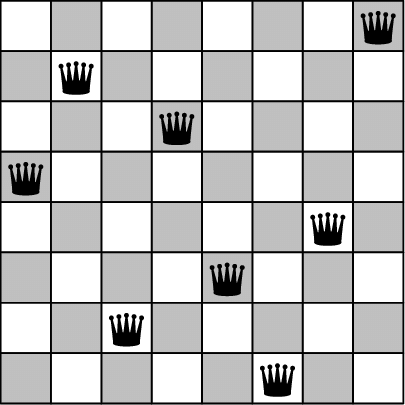


To solve this problem correctly. define the Heuristic function correctly, Apply A* agorithm to it and print the following information for each trial. Number of nodes explored, Optimal path cost, Total time taken for execution. [25 marks]

Consider in total, 5 trials,

 

---



1.   you have 4 queens in a 4x4 seating space.
2.   you have 5 queens in a 5x5 seating space.
3.   you have 6 queens in a 6x6 seating space.
4.  you have 7 queens in a 7x7 seating space.
5.  you have 8 queens in a 8x8 seating space.
5.  you have 9 queens in a 9x9 seating space.
5.  you have 10 queens in a 10x10 seating space.

----


In the end, plot a graph with all five trials in X-axis and following metrices in Y axis,
 * The number of nodes explored 
 * Optimnal path cost 
 * Total time taken by A* algorithm 

In [47]:
def convert_rep(arr):
    """
    Function to convert grid representation to my list co-ordinate representation
    """
    n = arr.shape[0]
    new_rep = []
    for j in range(n):
        for i in range(n):
            if arr[i][j] == 1:
                new_rep.append([i, j])
    return new_rep

In [48]:
def G(state):
    n = len(state)
    num_correct = n
    for queen in range(n):
        row = state[queen][0]
        column = state[queen][1]
        for other_queen in range(n):
            if other_queen!=queen:
                if(row == state[other_queen][0]):
                    num_correct = num_correct - 1
                    break
                if (abs(row - state[other_queen][0]) == abs(column - state[other_queen][1])):
                    num_correct = num_correct - 1
                    break
    return num_correct

Define heuristics

In [49]:
def queen_heuristic(state):
    n = len(state)
    num_attack = 0
    for queen in range(0, n):
        row = state[queen][0]
        column = state[queen][1]        
        for other_queen in range(queen+1, n):# looping from queen + 1 as I need to 
                                             #count something like number of handshakes
            if   (row == state[other_queen][0]):
                num_attack = num_attack + 1
            elif (abs(row - state[other_queen][0]) == abs(column - state[other_queen][1])):
                num_attack = num_attack + 1
    return num_attack

In [ ]:
def new_heuristic(state,goal): # defining a new heuristics 

Your solution using A*

## Astar done assuming queens dont change their columns and are present in different columns from beginning

In [50]:
import copy
def astar_q(start, H):
    n = len(start)
    parent = []
    explored_status = []
    q = PriorityQueue()
    q.put((G(start) + H(start), start))
    explored_status.append(start)
    goal = start
    parent.append([start, None])
    while True:
        if q.empty():# won't occur for n>=4
            break;
        state_info = q.get()
        state = state_info[1]
#         print(state)
        if(G(state) == n):
            goal = state
            break
        fn = G(state) + H(state)
        for queen in range(n):
            #going up the column
            if (state[queen][0] + 1)<n:
                new_state = copy.deepcopy(state)
                new_state[queen][0] = new_state[queen][0] + 1
                if new_state not in explored_status:
                    q.put((G(new_state) + H(new_state), new_state))
                    parent.append([new_state, state])
                    explored_status.append(new_state)
            #going down the column
            if (state[queen][0] - 1)>=0:
                new_state = copy.deepcopy(state)
                new_state[queen][0] = new_state[queen][0] - 1
                if new_state not in explored_status:
                    q.put((G(new_state) + H(new_state), new_state))
                    parent.append([new_state, state])
                    explored_status.append(new_state)
    return goal, len(explored_status), parent

In [53]:
start = [[0,0], [0,1], [0, 2], [0, 3], [0, 4]]
astar_q(start, queen_heuristic)[0:2]

([[0, 0], [2, 1], [4, 2], [1, 3], [3, 4]], 2874)

In [ ]:
# Your code goes here
